# 03 - PRESELECCIÓN MEJOR MODELO SEGÚN LAZYPREDICT

## IMPORTACIÓN DE PAQUETES

In [15]:
import numpy as np
import pandas as pd

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

## CARGAR DATOS

In [16]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.80,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.80,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.00,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.80,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.80,0,0.50,0


## SEPARAR PREDICTORAS Y TARGET

In [17]:
x = df.drop(columns='produccion').copy()
y = df.produccion.copy()

## DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [18]:
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size= 0.3, random_state = 42)

## MODELIZAR SEGÚN LAZYPREDICT

In [19]:
reg = LazyClassifier(verbose=0)
models, predictions = reg.fit(train_x, val_x, train_y, val_y)
models

  3%|▎         | 1/29 [00:00<00:03,  9.06it/s]c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 59%|█████▊    | 17/29 [00:00<00:00, 34.16it/s]c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|██████████| 29/29 [00:00<00:00, 32.04it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 3, number of negative: 18
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 21, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142857 -> initscore=-1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.86,0.63,0.63,0.85,0.01
LabelSpreading,0.86,0.63,0.63,0.85,0.01
GaussianNB,0.82,0.61,0.61,0.82,0.01
AdaBoostClassifier,0.88,0.57,0.57,0.85,0.11
ExtraTreeClassifier,0.84,0.55,0.55,0.82,0.02
ExtraTreesClassifier,0.84,0.55,0.55,0.82,0.19
DecisionTreeClassifier,0.63,0.50,0.50,0.69,0.03
Perceptron,0.76,0.50,0.50,0.77,0.01
BaggingClassifier,0.88,0.50,0.50,0.82,0.03


## CONCLUSIÓN:

Probaremos los siguientes modelos propuestos por LazyPredict:

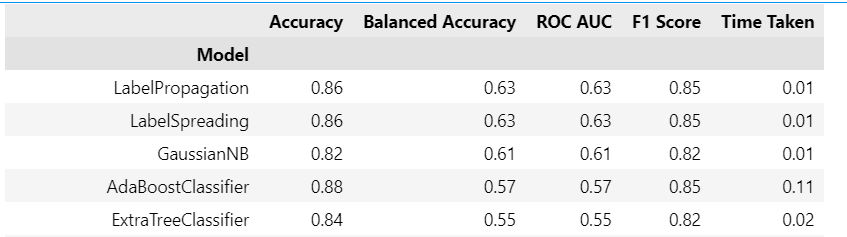

De primeras detectamos que el ROC AUC es muy bajo por lo que realizaremos los siguientes procesos.

1. Realizar predicción con modelos base con los modelos propuestos por LazyPredict
2. Preselección de variables y predecir con modelos base (incluiremos XGBClassifier y LGBMClassifier)
3. Revisaremos modelos vs métricas y evaluaremos el modelo definitivo con el GridSearch para evitar sobreajuste. 